In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Train_Dataset.csv")

In [3]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [5]:
df.isnull().sum()/len(df)*100

ID                             0.000000
Client_Income                  2.960051
Car_Owned                      2.938715
Bike_Owned                     2.974002
Active_Loan                    2.983029
House_Own                      3.004366
Child_Count                    2.985491
Credit_Amount                  2.980567
Loan_Annuity                   3.948923
Accompany_Client               1.432839
Client_Income_Type             3.037191
Client_Education               2.991236
Client_Marital_Status          2.850085
Client_Gender                  1.980206
Loan_Contract_Type             2.996159
Client_Housing_Type            3.025702
Population_Region_Relative     3.985852
Age_Days                       2.954307
Employed_Days                  2.994518
Registration_Days              2.965796
ID_Days                        4.897584
Own_House_Age                 65.729221
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000


In [6]:
null=pd.DataFrame(df.isnull().sum()/len(df)*100,columns=['percentage'])

In [7]:
null[null['percentage']>40]

,percentage
Own_House_Age,65.729221
Score_Source_1,56.488806
Social_Circle_Default,50.820641


In [8]:
a=null[null['percentage']>40].index

In [9]:
df.drop(a,axis=1,inplace=True)

In [10]:
null[(null['percentage']>=4) & (null['percentage']<40)]

,percentage
ID_Days,4.897584
Client_Occupation,34.003250
Score_Source_2,4.666163
Score_Source_3,22.092470
Credit_Bureau,15.214680


In [11]:
null[(null['percentage']>=4) & (null['percentage']<40)]

,percentage
ID_Days,4.897584
Client_Occupation,34.003250
Score_Source_2,4.666163
Score_Source_3,22.092470
Credit_Bureau,15.214680


In [12]:
b=null[(null['percentage']>=4) & (null['percentage']<40)].index

In [13]:
for i in b:
    print("column:",i)
    print("-"*30)
    print("unique_values:",df[i].unique())
    print("*"*100)

column: ID_Days
------------------------------
unique_values: ['383' '21' '331' ... 1017.0 3602.0 5025.0]
****************************************************************************************************
column: Client_Occupation
------------------------------
unique_values: ['Sales' nan 'Realty agents' 'Laborers' 'Core' 'Drivers' 'Managers'
 'Accountants' 'High skill tech' 'Cleaning' 'HR' 'Waiters/barmen'
 'Low-skill Laborers' 'Medicine' 'Cooking' 'Private service' 'Security'
 'IT' 'Secretaries']
****************************************************************************************************
column: Score_Source_2
------------------------------
unique_values: [0.47878667 0.21506834 0.55279497 ... 0.04807888 0.10353777 0.55641409]
****************************************************************************************************
column: Score_Source_3
------------------------------
unique_values: [nan 0.329655054 0.631354537 ... 0.029283299 0.023224871 0.030326003]
************

In [14]:
df['ID_Days']=df['ID_Days'].replace("x",np.nan)

<AxesSubplot:xlabel='ID_Days', ylabel='Density'>

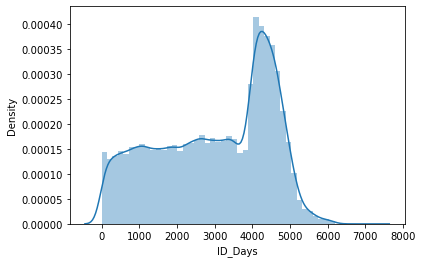

In [15]:
sns.distplot(df['ID_Days'])

In [16]:
df['ID_Days']=df['ID_Days'].fillna(df['ID_Days'].median()).astype("int")

<AxesSubplot:xlabel='Credit_Bureau', ylabel='Density'>

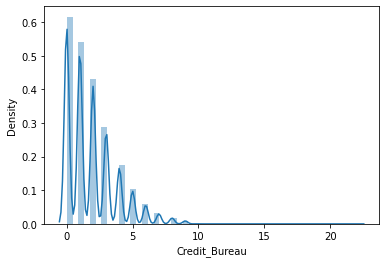

In [17]:
sns.distplot(df['Credit_Bureau'])

In [18]:
df['Credit_Bureau']=df['Credit_Bureau'].fillna(df['Credit_Bureau'].median())

In [19]:
df['Client_Occupation']=df['Client_Occupation'].fillna("other")

In [20]:
df['Score_Source_2'].describe()

count    116170.000000
mean          0.518625
std           0.740248
min           0.000005
25%           0.390164
50%           0.564978
75%           0.664011
max         100.000000
Name: Score_Source_2, dtype: float64

In [21]:
df['Score_Source_2']=df['Score_Source_2'].fillna(df['Score_Source_2'].median())

In [22]:
df['Score_Source_3'].dtype

dtype('O')

In [23]:
df[df['Score_Source_3']=='&']

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
28193,12105215,11250,0.0,1.0,1.0,1.0,0.0,26955.0,1836.45,Alone,...,3.0,18.0,Yes,Yes,Self-employed,0.302823,&,0.0,1.0,1


In [24]:
df=df[df['Score_Source_3']!='&']

In [25]:
df['Score_Source_3']=df['Score_Source_3'].astype("float")

In [26]:
df['Score_Source_3'].describe()

count    94934.000000
mean         0.511180
std          0.194333
min          0.000527
25%          0.372334
50%          0.537070
75%          0.667458
max          0.896010
Name: Score_Source_3, dtype: float64

In [27]:
df['Score_Source_3']=df['Score_Source_3'].fillna(df['Score_Source_3'].median())

In [28]:
null[(null['percentage']<4)&(null['percentage']>0)]

,percentage
Client_Income,2.960051
Car_Owned,2.938715
Bike_Owned,2.974002
Active_Loan,2.983029
House_Own,3.004366
Child_Count,2.985491
Credit_Amount,2.980567
Loan_Annuity,3.948923
Accompany_Client,1.432839
Client_Income_Type,3.037191


In [29]:
df.dropna(inplace=True)

In [30]:
cat_cols=df.select_dtypes(include="O").columns
cat_cols

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'Client_Occupation', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization'],
      dtype='object')

In [31]:
for i in cat_cols:
    print(i)
    print(df[i].unique())

Client_Income
['6750' '11250' '15750' ... '9764.1' '21105' '16752.6']
Credit_Amount
['61190.55' '13752' '128835' ... '6776.55' '58762.35' '62428.95']
Loan_Annuity
['3416.85' '653.85' '3779.55' ... 3388.05 2989.35 4201.65]
Accompany_Client
['Alone' 'Relative' 'Others' 'Kids' 'Partner' 'Group' '##']
Client_Income_Type
['Commercial' 'Service' 'Retired' 'Govt Job' 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
Client_Education
['Secondary' 'Graduation' 'Graduation dropout' 'Junior secondary'
 'Post Grad']
Client_Marital_Status
['M' 'W' 'S' 'D']
Client_Gender
['Male' 'Female' 'XNA']
Loan_Contract_Type
['CL' 'RL']
Client_Housing_Type
['Home' 'Family' 'Office' 'Municipal' 'Rental' 'Shared']
Population_Region_Relative
['0.028663' '0.019101' '0.016612' '0.009175' '0.001417' '0.020713'
 '0.00963' '0.008068' '0.04622' '0.032561' '0.006852' '0.035792'
 '0.010147' '0.00733' '0.010276' '0.01452' '0.018029' '0.00496' '0.014464'
 '0.008575' '0.026392' '0.008019' '0.019689' '0.031329' '0.0106

In [32]:
df['Client_Income']=df['Client_Income'].replace("$",np.nan).astype("float")

<AxesSubplot:xlabel='Client_Income', ylabel='Density'>

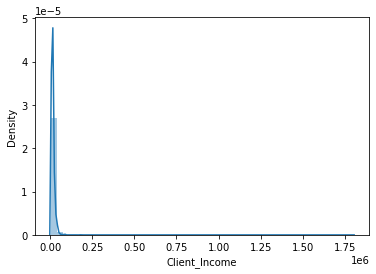

In [33]:
sns.distplot(df['Client_Income'])

In [34]:
df['Client_Income']=df['Client_Income'].fillna(df['Client_Income'].median())

In [35]:
df['Credit_Amount']=df['Credit_Amount'].replace("$",np.nan).astype("float")

<AxesSubplot:xlabel='Credit_Amount', ylabel='Density'>

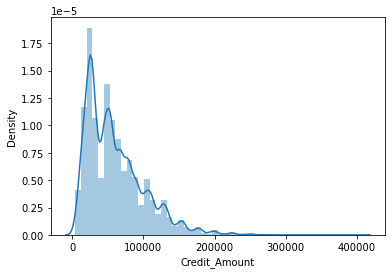

In [36]:
sns.distplot(df['Credit_Amount'])

In [37]:
df['Credit_Amount']=df['Credit_Amount'].fillna(df['Credit_Amount'].median())

In [38]:
df['Loan_Annuity']=df['Loan_Annuity'].replace('#VALUE!',np.nan).astype("float")

<AxesSubplot:xlabel='Loan_Annuity', ylabel='Density'>

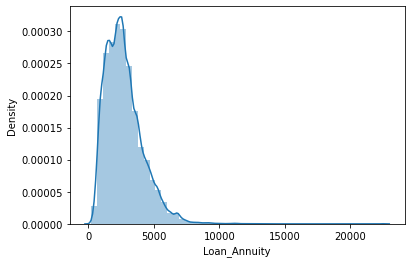

In [39]:
sns.distplot(df['Loan_Annuity'])

In [40]:
df['Loan_Annuity']=df['Loan_Annuity'].fillna(df['Loan_Annuity'].median())

In [41]:
df['Accompany_Client'].value_counts()

Alone       48231
Relative     7727
Partner      2176
Kids          650
Others        527
Group          50
##              4
Name: Accompany_Client, dtype: int64

In [42]:
df['Accompany_Client']=df['Accompany_Client'].replace('##',"Alone")

In [43]:
df['Population_Region_Relative']=df['Population_Region_Relative'].replace('@',np.nan)

In [44]:
df['Population_Region_Relative']=df['Population_Region_Relative'].replace('#',np.nan).astype("float")

In [45]:
df['Population_Region_Relative']=df['Population_Region_Relative'].fillna(df['Population_Region_Relative'].median())

In [46]:
df['Age_Days']=df['Age_Days'].replace("x",np.nan).astype("float")

<AxesSubplot:xlabel='Age_Days', ylabel='Density'>

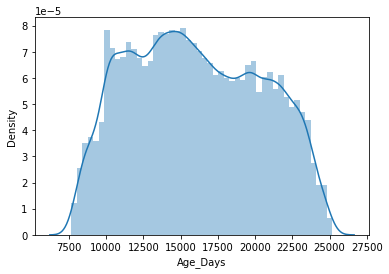

In [47]:
sns.distplot(df['Age_Days'])

In [48]:
df['Age_Days']=df['Age_Days'].fillna(df['Age_Days'].mean())

In [49]:
df['Age_Days']=df['Age_Days'].astype("int")

In [50]:
df['Employed_Days']=df['Employed_Days'].replace("x",np.nan).astype("float")

<AxesSubplot:xlabel='Employed_Days', ylabel='Density'>

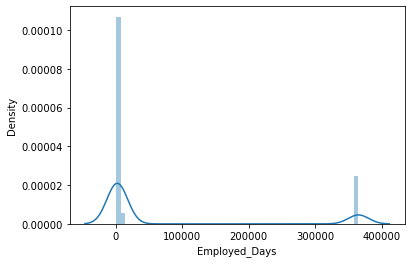

In [51]:
sns.distplot(df['Employed_Days'])

In [52]:
df['Employed_Days']=df['Employed_Days'].fillna(df['Employed_Days'].median()).astype("int")

In [53]:
df['Registration_Days']=df['Registration_Days'].replace("x",np.nan).astype("float")

<AxesSubplot:xlabel='Registration_Days', ylabel='Density'>

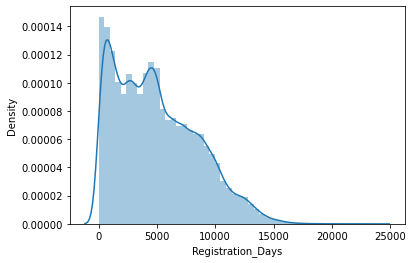

In [54]:
sns.distplot(df['Registration_Days'])

In [55]:
df['Registration_Days']=df['Registration_Days'].fillna(df['Registration_Days'].median()).astype("int")

In [56]:
df['Client_Gender'].value_counts()

Male      39083
Female    20281
XNA           1
Name: Client_Gender, dtype: int64

In [57]:
df['Client_Gender']=df['Client_Gender'].replace('XNA',"Male")

In [58]:
df.nunique()

ID                            59365
Client_Income                   839
Car_Owned                         2
Bike_Owned                        2
Active_Loan                       2
House_Own                         2
Child_Count                      12
Credit_Amount                  3517
Loan_Annuity                   9120
Accompany_Client                  6
Client_Income_Type                8
Client_Education                  5
Client_Marital_Status             4
Client_Gender                     2
Loan_Contract_Type                2
Client_Housing_Type               6
Population_Region_Relative       80
Age_Days                      16042
Employed_Days                  8308
Registration_Days             12930
ID_Days                        5757
Mobile_Tag                        1
Homephone_Tag                     2
Workphone_Working                 2
Client_Occupation                19
Client_Family_Members            14
Cleint_City_Rating                3
Application_Process_Day     

In [59]:
df.drop("ID",axis=1,inplace=True)

In [60]:
df.drop(['Mobile_Tag'],axis=1,inplace=True)

In [61]:
num_cols=df.select_dtypes(include=['int','float']).columns
print(num_cols,len(num_cols))

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Homephone_Tag', 'Workphone_Working',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_2',
       'Score_Source_3', 'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object') 24


In [62]:
for i in num_cols:
    print("column:",i)
    print("unique values:",df[i].unique())

column: Client_Income
unique values: [   6750.      11250.      15750.      13500.      27000.       8100.
   45000.      19350.      22500.      21600.      20250.       9000.
   24750.      18000.      54000.      14400.      12150.      13950.
    6525.      16200.       7560.       9900.      12600.      18900.
   31500.      30600.      29700.       9450.      17100.       7425.
   10350.       4590.       7650.      29250.      63000.      16650.
   27900.      31050.      10800.      36000.      14850.      11700.
   15300.      24300.      26100.      10636.2      7200.       8550.
   17550.       3600.       4500.      20700.       6300.      33750.
   23490.       7875.      38250.      32400.      40500.      11925.
   23400.       5985.      23850.       5400.      26550.      17820.
   21375.      49500.      39150.      14175.      44100.      67500.
   16155.       3150.       5850.      19800.      38700.       5220.
   58500.      14040.      15975.      13050.      17

In [63]:
c=['Car_Owned','Bike_Owned','Active_Loan','House_Own','Child_Count','Client_Family_Members','Cleint_City_Rating','Application_Process_Day','Application_Process_Hour','Phone_Change']

In [64]:
for i in c:
    df[i]=df[i].astype("int")

In [65]:
df.shape

(59365, 35)

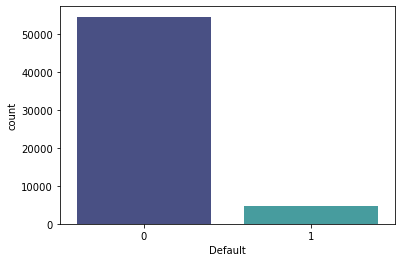

In [66]:
sns.countplot(df['Default'],palette='mako')
plt.show()

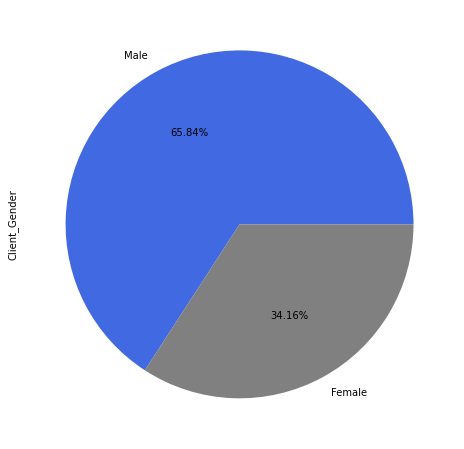

In [67]:
plt.figure(figsize=(10,8))
df['Client_Gender'].value_counts().plot.pie(autopct="%0.2f%%",colors=['royalblue','gray'])
plt.show()

In [68]:
cat_cols=df.select_dtypes(include='O').columns

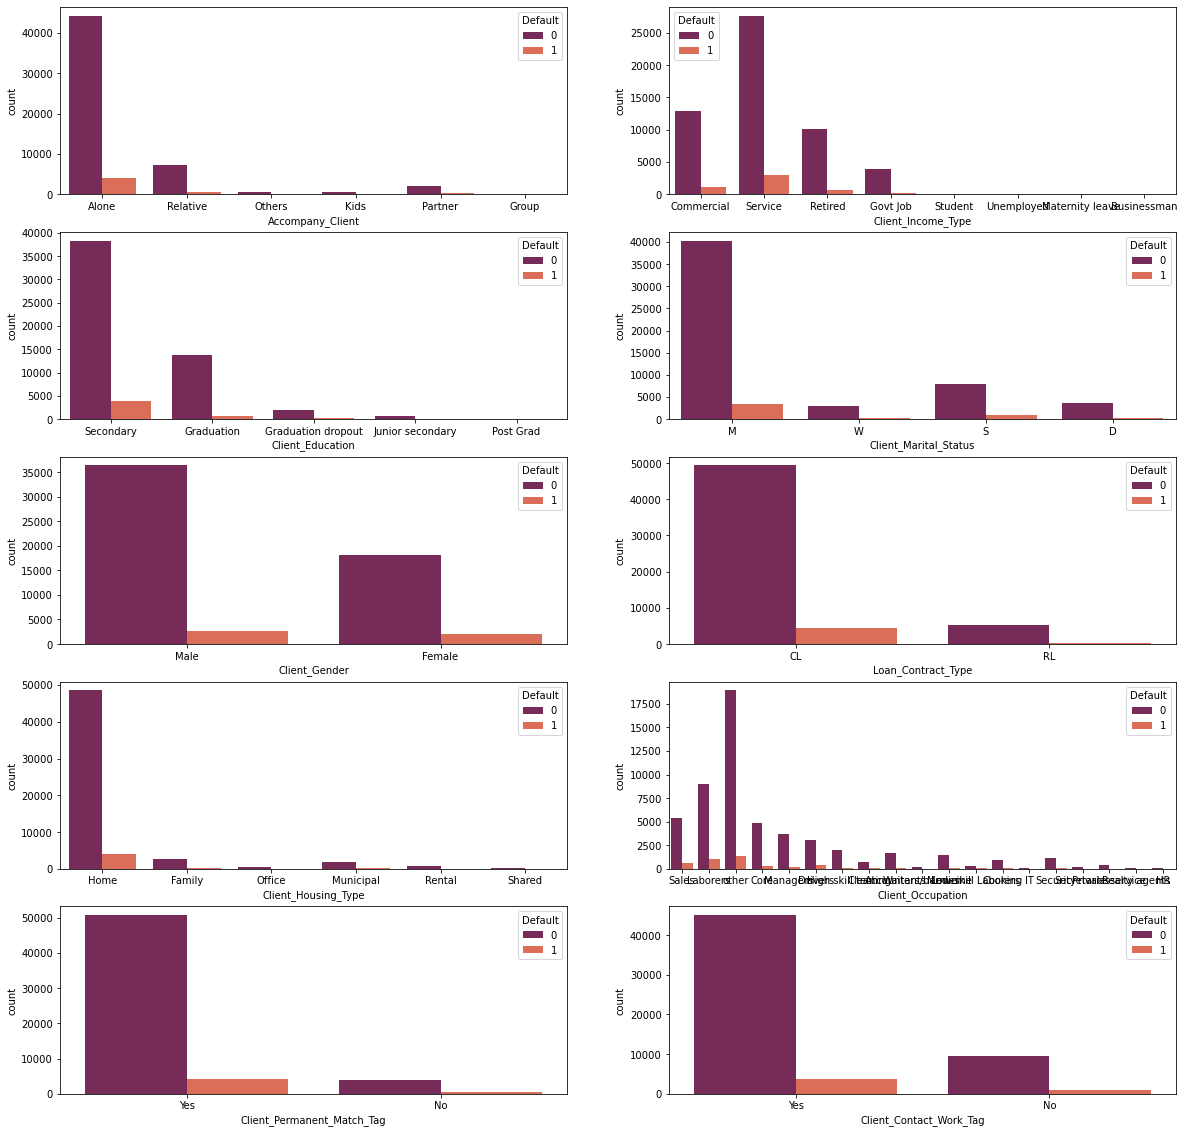

In [69]:
plt.figure(figsize=(20,20))
count=1
for i in cat_cols[:-1]:
    plt.subplot(5,2,count)
    sns.countplot(df[i],hue=df['Default'],palette='rocket')
    count+=1

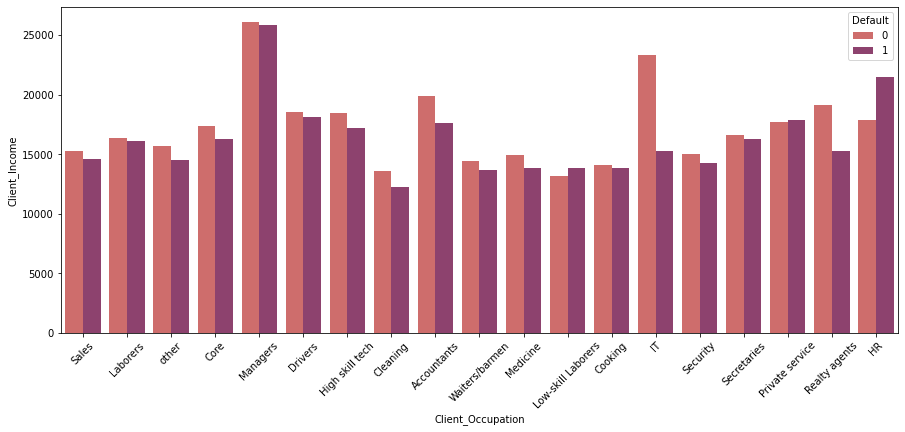

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(df['Client_Occupation'],df['Client_Income'],hue=df['Default'],ci=False,palette='flare')
plt.xticks(rotation=45)
plt.show()

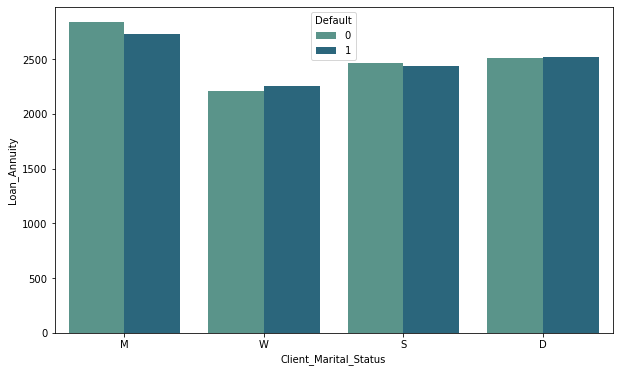

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(df['Client_Marital_Status'],df['Loan_Annuity'],hue=df['Default'],ci=False,palette='crest')
plt.show()

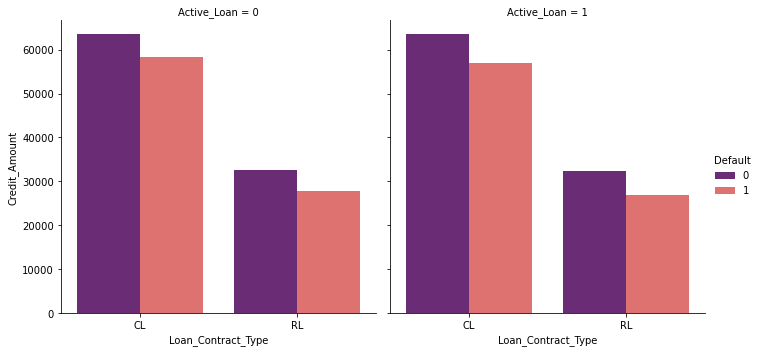

In [72]:
sns.catplot(x='Loan_Contract_Type',y='Credit_Amount',hue='Default',col='Active_Loan',data=df,kind='bar',ci=False,palette='magma')

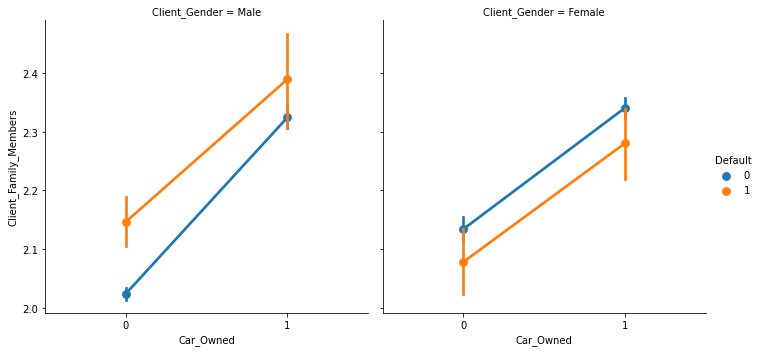

In [73]:
sns.factorplot(y='Client_Family_Members',x='Car_Owned',col='Client_Gender',hue='Default',data=df)
plt.show()

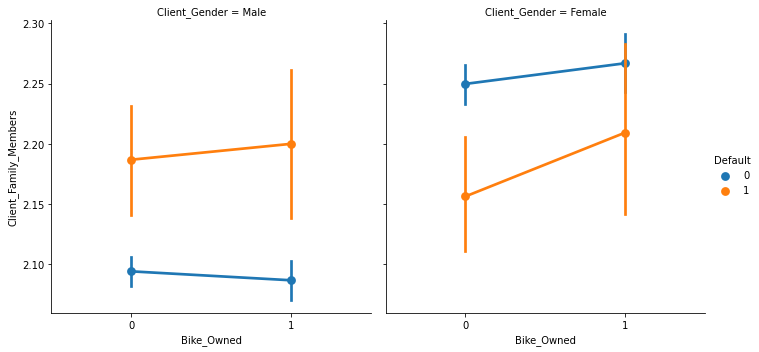

In [74]:
sns.factorplot(y='Client_Family_Members',x='Bike_Owned',col='Client_Gender',hue='Default',data=df)
plt.show()

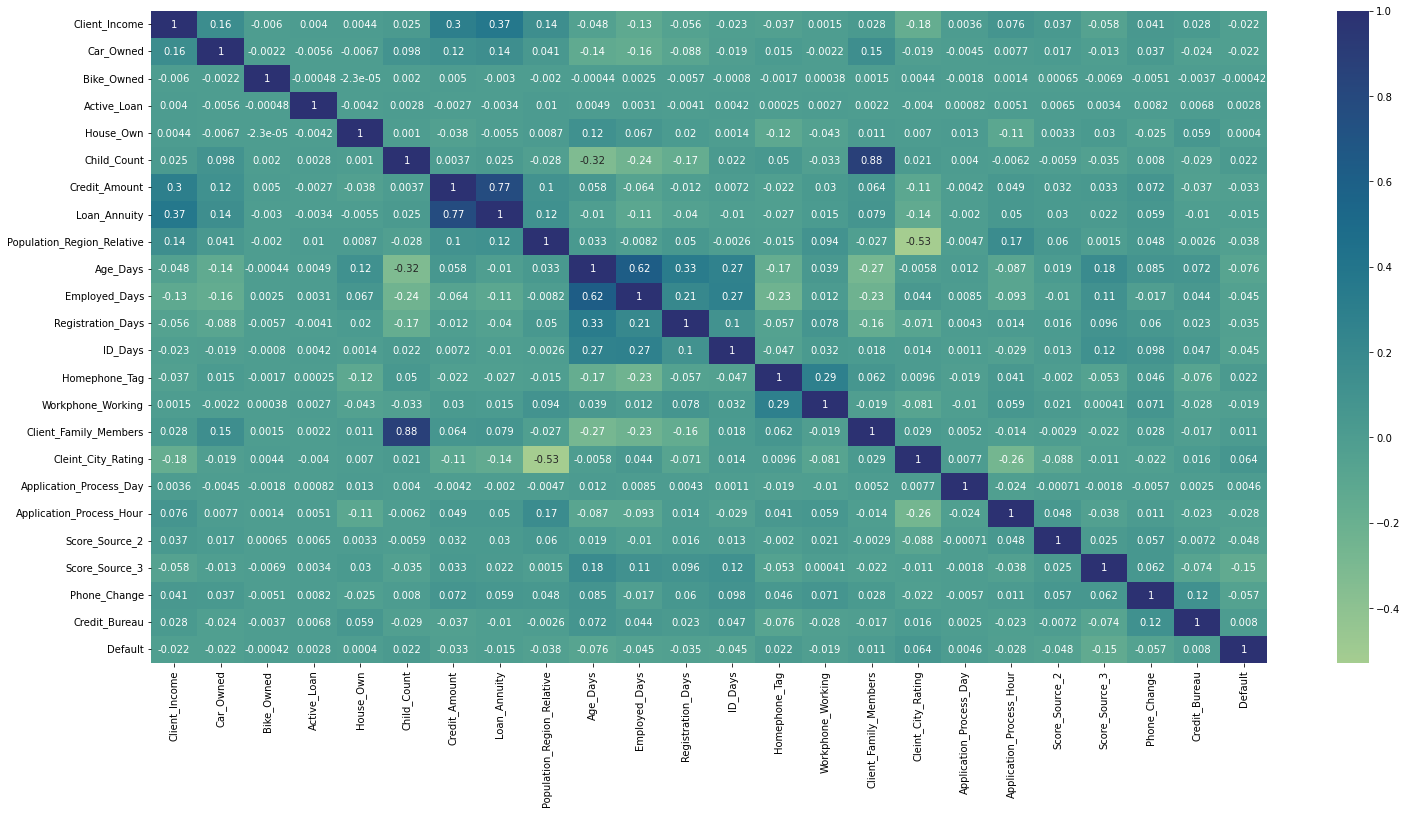

In [75]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_cols=df.select_dtypes(include="O").columns
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [77]:
x=df.drop(["Default"],axis=1)
y=df['Default']

In [78]:
from imblearn.over_sampling import SMOTE 
ios=SMOTE(sampling_strategy='auto')
x,y=ios.fit_resample(x,y)

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
model1=LogisticRegression()
model2=AdaBoostClassifier()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier()
model5=XGBClassifier()

In [83]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
def my_model(model):
    print("."*35)
    print("Algorithm:",model)
    print("."*35,)
    print("Evaluation metrics: f1_score")
    print("."*35,'\n')
    score=cross_val_score(model,x,y,scoring='f1',cv=5)
    mean_score=score.mean()
    print("cross_val_score:",mean_score)
    print("-"*16)
    print("\n")
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print("Train Data:")
    print("-"*10)
    print("Score:",f1_score(y_train,y_pred_train))
    print("\n")
    print("confusion_matrix:")
    print("-"*17)
    print(confusion_matrix(y_train,y_pred_train))
    print("\n")
    print("Test Data:")
    print("-"*10)
    print("Score:",f1_score(y_test,y_pred_test))
    print("\n")
    print("confusion_matrix:")
    print("-"*17)
    print(confusion_matrix(y_test,y_pred_test))

In [84]:
my_model(model1)

...................................
Algorithm: LogisticRegression()
...................................
Evaluation metrics: f1_score
................................... 

cross_val_score: 0.5588821722067225
----------------


Train Data:
----------
Score: 0.8111100921637855


confusion_matrix:
-----------------
[[35487  8170]
 [ 8308 35379]]


Test Data:
----------
Score: 0.7912047472284833


confusion_matrix:
-----------------
[[8697 2236]
 [2303 8600]]


In [85]:
my_model(model2)

...................................
Algorithm: AdaBoostClassifier()
...................................
Evaluation metrics: f1_score
................................... 

cross_val_score: 0.859158675112532
----------------


Train Data:
----------
Score: 0.870148385551513


confusion_matrix:
-----------------
[[37813  5844]
 [ 5541 38146]]


Test Data:
----------
Score: 0.8107244915111783


confusion_matrix:
-----------------
[[7686 3247]
 [1257 9646]]


In [86]:
my_model(model3)

...................................
Algorithm: RandomForestClassifier()
...................................
Evaluation metrics: f1_score
................................... 

cross_val_score: 0.9309494384951748
----------------


Train Data:
----------
Score: 1.0


confusion_matrix:
-----------------
[[43657     0]
 [    0 43687]]


Test Data:
----------
Score: 0.8807032231059022


confusion_matrix:
-----------------
[[9803 1130]
 [1435 9468]]


In [87]:
my_model(model4)

...................................
Algorithm: GradientBoostingClassifier()
...................................
Evaluation metrics: f1_score
................................... 

cross_val_score: 0.8908658764073071
----------------


Train Data:
----------
Score: 0.9044546558415276


confusion_matrix:
-----------------
[[41330  2327]
 [ 5699 37988]]


Test Data:
----------
Score: 0.7784060518071368


confusion_matrix:
-----------------
[[ 5849  5084]
 [  716 10187]]


In [88]:
my_model(model5)

...................................
Algorithm: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
...................................
Evaluation metrics: f1_score
................................... 

cross_val_score: 0.9336314684682143
----------------


Train Data:
----------
Score: 0.96080582192

In [119]:
param_grid = {
    'C': [0.0001,0.001, 0.01, 1,5, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(300,1000,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
model6=RandomizedSearchCV(model1,param_distributions=param_grid,scoring="f1",cv=5,n_jobs=-1)

In [122]:
model6.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 1, 5, 10,
                                              100, 1000],
                                        'max_iter': [300, 400, 500, 600, 700,
                                                     800, 900],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='f1')

In [123]:
model6.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 600, 'C': 5}

In [124]:
y_pred_train=model6.predict(x_train)
y_pred_test=model6.predict(x_test)

In [125]:
print("Train_Data")
print(f1_score(y_train,y_pred_train))
print("Test_Data")
print(f1_score(y_test,y_pred_test))

Train_Data
0.8111373484032188
Test_Data
0.7911855361825458


In [116]:
performance={"Model":["LogisticRegression","AdaBoostClassifier","RandomForestClassifier","GradientBoostingClassifier","XGBClassifier","RandomizedSearchCV(XGB)"],
            "Train_score":[0.81,0.87,0.93,0.90,0.93,0.81],
            "Test_score":[0.79,0.81,0.88,0.77,0.73,0.79]}

In [117]:
pd.DataFrame(performance)

,Model,Train_score,Test_score
0,LogisticRegression,0.81,0.79
1,AdaBoostClassifier,0.87,0.81
2,RandomForestClassifier,0.93,0.88
3,GradientBoostingClassifier,0.90,0.77
4,XGBClassifier,0.93,0.73
5,RandomizedSearchCV(XGB),0.81,0.79
